# Play with data in pandas

In [1]:
import pandas as pd
import numpy as np

In [3]:
from urllib.request import urlretrieve
URL = "http://go.gwu.edu/engcomp2data1?accessType=DOWNLOAD"
urlretrieve(URL, "beers.csv")

('beers.csv', <http.client.HTTPMessage at 0x7f42ba77c278>)

In [4]:
!head beers.csv

,abv,ibu,id,name,style,brewery_id,ounces
0,0.05,,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.09,,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,,2262,Sex and Candy,American IPA,177,12.0
5,0.077,,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,,2259,Foreman,American Porter,177,12.0
8,0.055,,2258,Jade,American Pale Ale (APA),177,12.0


In [5]:
beers = pd.read_csv("beers.csv")

In [6]:
type(beers)

pandas.core.frame.DataFrame

In [7]:
beers

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [8]:
beers['abv']

0       0.050
1       0.066
2       0.071
3       0.090
4       0.075
        ...  
2405    0.067
2406    0.052
2407    0.055
2408    0.055
2409    0.052
Name: abv, Length: 2410, dtype: float64

In [10]:
type(beers["abv"])

pandas.core.series.Series

In [11]:
type(beers)

pandas.core.frame.DataFrame

In [13]:
beers["abv"][:10]

0    0.050
1    0.066
2    0.071
3    0.090
4    0.075
5    0.077
6    0.045
7    0.065
8    0.055
9    0.086
Name: abv, dtype: float64

In [14]:
abv_series = beers["abv"]

In [15]:
len(abv_series)

2410

In [16]:
abv_clean = abv_series.dropna() #dropna() reduce the “NA”

In [17]:
len(abv_clean)

2348

In [18]:
abv_clean

0       0.050
1       0.066
2       0.071
3       0.090
4       0.075
        ...  
2405    0.067
2406    0.052
2407    0.055
2408    0.055
2409    0.052
Name: abv, Length: 2348, dtype: float64

In [19]:
abv = abv_clean.values
print(abv)

[0.05  0.066 0.071 ... 0.055 0.055 0.052]


In [20]:
type(abv)

numpy.ndarray

In [21]:
np.max(abv)

0.128

In [22]:
np.mean(abv)

0.059773424190800686

In [23]:
np.std(abv)

0.013538849735449245

In [26]:
ibu_series = beers["ibu"]
print(len(ibu_series))

2410


In [27]:
ibu_clean = ibu_series.dropna()

In [28]:
print(len(ibu_clean))

1405


In [29]:
from matplotlib import pyplot
from matplotlib import rcParams

In [30]:
rcParams["font.family"] = "serif"
rcParams["font.size"] = 16

Text(0, 0.5, 'Frequency')

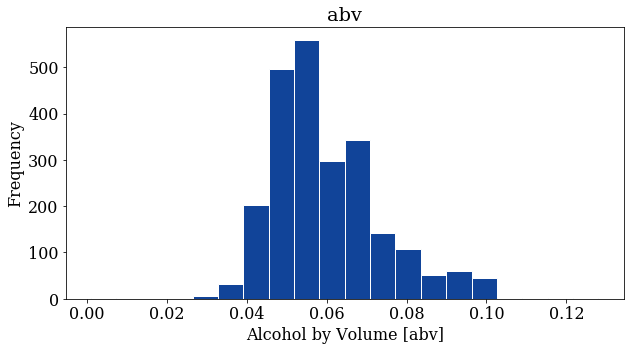

In [36]:
pyplot.figure(figsize=(10,5))

pyplot.hist(abv,bins = 20, color ="#114499", histtype= "bar", edgecolor = 'white')
pyplot.title("abv")
pyplot.xlabel("Alcohol by Volume [abv]")
pyplot.ylabel("Frequency")

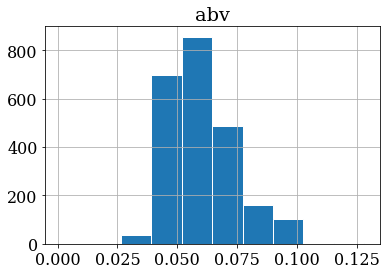

In [38]:
beers.hist(column = 'abv', edgecolor ='white')

# Categorical data

In [39]:
style_series = beers["style"]
type(style_series)

pandas.core.series.Series

In [40]:
style_series

0                  American Pale Lager
1              American Pale Ale (APA)
2                         American IPA
3       American Double / Imperial IPA
4                         American IPA
                     ...              
2405                       Belgian IPA
2406          American Amber / Red Ale
2407                       Schwarzbier
2408           American Pale Ale (APA)
2409          American Amber / Red Ale
Name: style, Length: 2410, dtype: object

In [57]:
style_counts = style_series.value_counts(ascending=True)

In [68]:
style_counts[0:15]

Smoked Beer                           1
American Malt Liquor                  1
Kristalweizen                         1
Braggot                               1
Low Alcohol Beer                      1
Grisette                              1
Flanders Oud Bruin                    1
Flanders Red Ale                      1
Other                                 1
Wheat Ale                             1
Roggenbier                            2
Abbey Single Ale                      2
English Stout                         2
American Double / Imperial Pilsner    2
Euro Pale Lager                       2
Name: style, dtype: int64

In [69]:
style_counts[-10:]

Witbier                            51
Saison / Farmhouse Ale             52
American Porter                    68
American Brown Ale                 70
American Pale Wheat Ale            97
American Double / Imperial IPA    105
American Blonde Ale               108
American Amber / Red Ale          133
American Pale Ale (APA)           245
American IPA                      424
Name: style, dtype: int64

In [65]:
type(style_counts)

pandas.core.series.Series

In [66]:
len(style_counts)

99

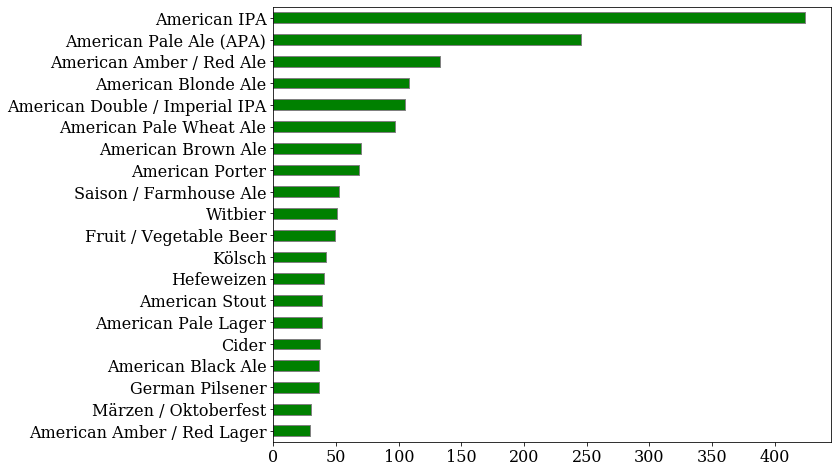

In [70]:
style_counts[-20:].plot.barh(figsize=(10,8), color='green', edgecolor='gray');